In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('palm_ffb.csv')
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


### Pearson Correlation

In [4]:
data.corr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


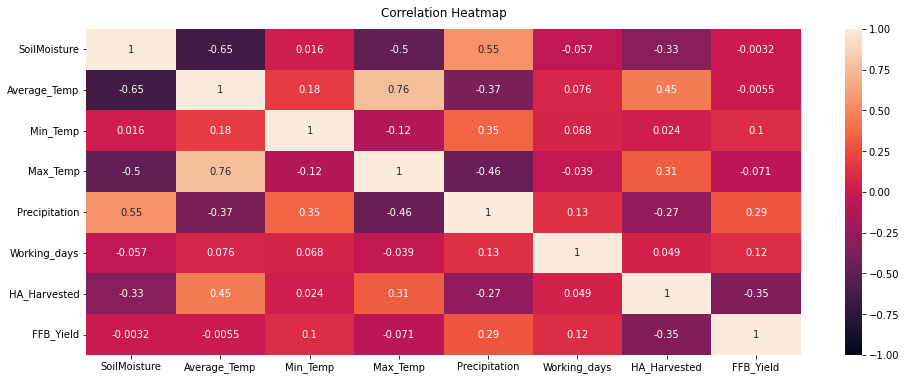

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [6]:
correlation_list = data.corr()
print(correlation_list['FFB_Yield'].sort_values(ascending=True))

HA_Harvested    -0.350222
Max_Temp        -0.071201
Average_Temp    -0.005494
SoilMoisture    -0.003183
Min_Temp         0.103830
Working_days     0.116364
Precipitation    0.289604
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64


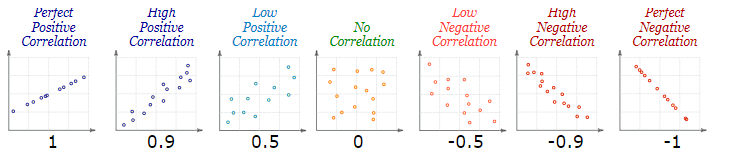

(0.0, 2.3295)

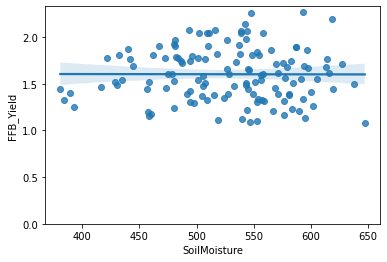

In [7]:
sns.regplot(x='SoilMoisture', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

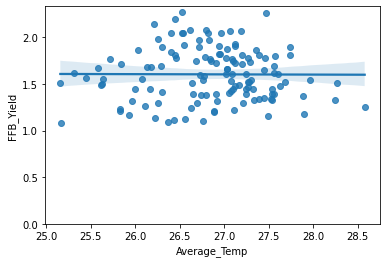

In [8]:
sns.regplot(x='Average_Temp', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

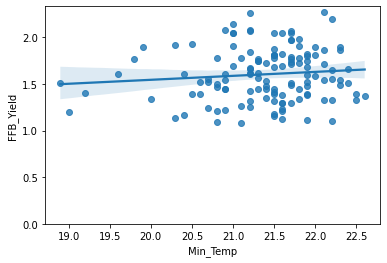

In [9]:
sns.regplot(x='Min_Temp', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

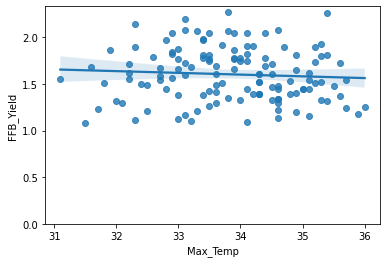

In [10]:
sns.regplot(x='Max_Temp', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

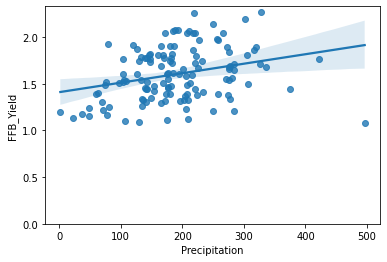

In [11]:
sns.regplot(x='Precipitation', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

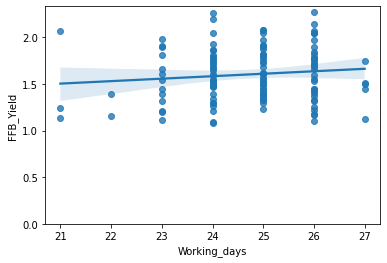

In [12]:
sns.regplot(x='Working_days', y='FFB_Yield', data=data)
plt.ylim(0,)

(0.0, 2.3295)

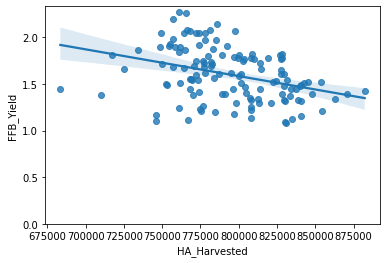

In [13]:
sns.regplot(x='HA_Harvested', y='FFB_Yield', data=data)
plt.ylim(0,)

In [14]:
from scipy import stats

In [15]:
pearson_coef, p_value = stats.pearsonr(data['SoilMoisture'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.003182901354288907  with a P-value of P = 0.9713300051590029


In [16]:
pearson_coef, p_value = stats.pearsonr(data['Average_Temp'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0054943529235985675  with a P-value of P = 0.95053043130921


In [17]:
pearson_coef, p_value = stats.pearsonr(data['Min_Temp'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.10382969410528088  with a P-value of P = 0.2397598314510036


In [18]:
pearson_coef, p_value = stats.pearsonr(data['Max_Temp'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07120090454850744  with a P-value of P = 0.42082145429981255


In [19]:
pearson_coef, p_value = stats.pearsonr(data['Precipitation'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2896037241228685  with a P-value of P = 0.0008317241812972529


In [20]:
pearson_coef, p_value = stats.pearsonr(data['Working_days'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.11636407232753454  with a P-value of P = 0.18736169506155137


In [21]:
pearson_coef, p_value = stats.pearsonr(data['HA_Harvested'], data['FFB_Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.3502218383833432  with a P-value of P = 4.413086896894055e-05


### Feature Importance

In [22]:
x = data.drop(['Date','FFB_Yield'], axis=1)
y = data.FFB_Yield

In [23]:
x

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222
...,...,...,...,...,...,...,...
125,498.2,27.213333,21.6,33.6,165.6,24,820758.9147
126,494.7,27.074194,21.2,33.5,154.7,26,882254.2254
127,478.8,27.016129,20.4,33.6,127.2,25,829488.8199
128,481.1,26.946667,21.0,34.2,180.6,23,792101.0471


In [24]:
y

0      1.62
1      1.45
2      1.56
3      1.39
4      1.44
       ... 
125    1.29
126    1.42
127    1.61
128    1.91
129    2.04
Name: FFB_Yield, Length: 130, dtype: float64

[21:58:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.09442
Feature: 1, Score: 0.13203
Feature: 2, Score: 0.10492
Feature: 3, Score: 0.09676
Feature: 4, Score: 0.23888
Feature: 5, Score: 0.06003
Feature: 6, Score: 0.27297


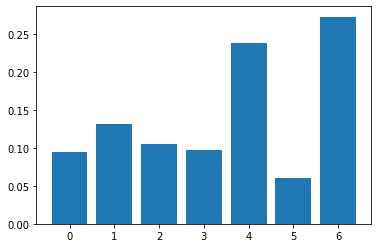

In [25]:
# xgboost for feature importance on a regression problem
# define the model
model = XGBRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()